In [1]:
from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer

from sklearn import svm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn import neighbors
from math import sqrt

In [12]:
df = pd.read_csv("C:\\Users\\dell\\Desktop\\Data Science Project\\main_train.csv")


In [4]:
df.head(10)

,S.No,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,1,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,3,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
2,4,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
3,5,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
4,6,-0.762936,-1.116955,0.334901,-1.303017,-1.222429,-0.248197,1.031031,-0.246341,-2.522203,-1.831931,-2.062549,-2.017884,4
5,8,-0.738450,-1.113986,0.336256,-1.305155,-1.222432,-0.248321,1.030107,-0.246035,-2.522844,-1.832182,-2.061953,-2.017213,4
6,10,-0.727130,-1.109486,0.335988,-1.305633,-1.222431,-0.248294,1.029636,-0.245888,-2.522677,-1.831438,-2.062317,-2.018180,4
7,13,-0.704877,-1.109986,0.336241,-1.305820,-1.222434,-0.248002,1.029318,-0.245780,-2.522214,-1.832052,-2.062118,-2.017589,4
8,14,-0.682534,-1.111362,0.335566,-1.303240,-1.222430,-0.247513,1.029274,-0.245775,-2.521926,-1.832031,-2.061756,-2.017257,4
9,17,-0.620099,-1.114285,0.335909,-1.305675,-1.222430,-0.247884,1.029211,-0.245729,-2.522311,-1.831778,-2.061331,-2.017632,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698649 entries, 0 to 698648
Data columns (total 14 columns):
S.No              698649 non-null int64
ambient           698649 non-null float64
coolant           698649 non-null float64
u_d               698649 non-null float64
u_q               698649 non-null float64
motor_speed       698649 non-null float64
torque            698649 non-null float64
i_d               698649 non-null float64
i_q               698649 non-null float64
pm                698649 non-null float64
stator_yoke       698649 non-null float64
stator_tooth      698649 non-null float64
stator_winding    698649 non-null float64
profile_id        698649 non-null int64
dtypes: float64(12), int64(2)
memory usage: 74.6 MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No,698649.0,499093.869157,288133.057977,1.000000,249410.000000,498978.000000,748685.000000,998070.000000
ambient,698649.0,-0.003129,0.992710,-7.968341,-0.598182,0.266325,0.686697,2.967117
coolant,698649.0,0.004779,1.002086,-1.367800,-1.037856,-0.176651,0.648482,2.649032
u_d,698649.0,0.004275,0.997729,-1.654878,-0.827631,0.267501,0.358460,2.274734
u_q,698649.0,-0.005819,1.002404,-1.861463,-0.927994,-0.099512,0.852677,1.793498
motor_speed,698649.0,-0.006024,1.001700,-1.371529,-0.951892,-0.140246,0.855411,2.024151
torque,698649.0,-0.002985,0.997403,-3.345953,-0.266604,-0.187167,0.547458,3.016895
i_d,698649.0,0.005794,0.999005,-3.245874,-0.756753,0.213188,1.013975,1.060937
i_q,698649.0,-0.002809,0.997375,-3.341639,-0.257268,-0.188490,0.499623,2.914185
pm,698649.0,-0.004385,0.995450,-2.631991,-0.671621,0.094138,0.680431,2.917456


In [8]:
df.isnull().values.any()

False

In [9]:
# Count the number of NaNs each column has.
nans=pd.isnull(df).sum()
nans[nans>0]

Series([], dtype: int64)

In [10]:


df.corr()



,S.No,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
S.No,1.000000,0.372540,0.473517,0.306600,-0.144830,-0.174654,-0.278470,0.161667,-0.278129,0.136334,0.356708,0.236997,0.137878,0.970839
ambient,0.372540,1.000000,0.434070,0.195035,0.087877,0.078842,-0.262591,0.005567,-0.260852,0.501772,0.451555,0.396907,0.302270,0.384206
coolant,0.473517,0.434070,1.000000,0.178710,0.027681,-0.032963,-0.189276,0.107858,-0.185776,0.430885,0.874034,0.689205,0.509759,0.499557
u_d,0.306600,0.195035,0.178710,1.000000,-0.027819,-0.234200,-0.821098,0.358674,-0.796324,-0.082117,0.041710,-0.065836,-0.150296,0.300428
u_q,-0.144830,0.087877,0.027681,-0.027819,1.000000,0.717111,-0.037028,-0.182545,-0.026160,0.101475,0.106183,0.149082,0.125601,-0.122164
motor_speed,-0.174654,0.078842,-0.032963,-0.234200,0.717111,1.000000,0.024583,-0.723145,0.006349,0.332852,0.182961,0.334283,0.393611,-0.166079
torque,-0.278470,-0.262591,-0.189276,-0.821098,-0.037028,0.024583,1.000000,-0.238838,0.996565,-0.073057,-0.092276,-0.011416,0.080399,-0.257156
i_d,0.161667,0.005567,0.107858,0.358674,-0.182545,-0.723145,-0.238838,1.000000,-0.204010,-0.299330,-0.180409,-0.388120,-0.540351,0.142502
i_q,-0.278129,-0.260852,-0.185776,-0.796324,-0.026160,0.006349,0.996565,-0.204010,1.000000,-0.086657,-0.098888,-0.025615,0.060306,-0.255902
pm,0.136334,0.501772,0.430885,-0.082117,0.101475,0.332852,-0.073057,-0.299330,-0.086657,1.000000,0.695267,0.768570,0.729916,0.157029


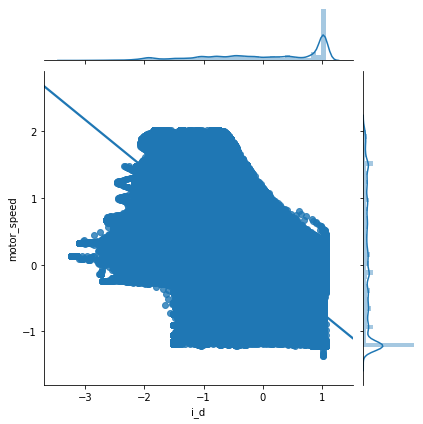

In [11]:
import seaborn as sns
sns.jointplot(x='i_d', y='motor_speed', data=df, kind='reg')

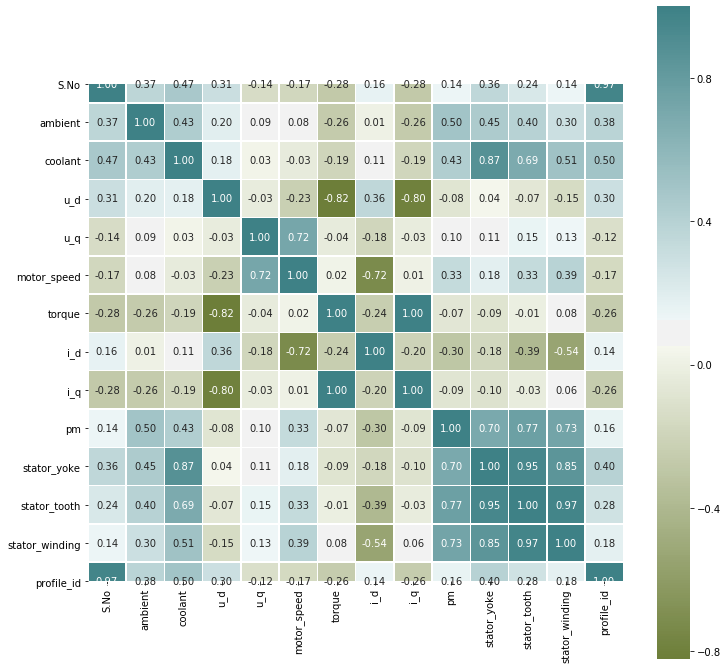

In [13]:
#correlation map
f,ax=plt.subplots(figsize=(12,12))
corr=df.corr()

sns.heatmap(corr, annot=True, linewidths=.5, fmt='.2f', 
            mask= np.zeros_like(corr,dtype=np.bool), 
            cmap=sns.diverging_palette(100,200,as_cmap=True), 
            square=True, ax=ax)

plt.show()

In [14]:
#BASIC LINEAR REGRESSION

import statsmodels.api as sm
#Defining dependet and independent variable
X = df['i_d']
X=sm.add_constant(X)

y = df['motor_speed']

lm=sm.OLS(y,X)
model=lm.fit()

model.summary()

C:\Users\dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            motor_speed   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                 7.658e+05
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:42:19   Log-Likelihood:            -7.3399e+05
No. Observations:              698649   AIC:                         1.468e+06
Df Residuals:                  698647   BIC:                         1.468e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0018      0.001     -2.202      0.028      -0.003      -0.000
i_d           -0.7251      0.001   -875.118      0.000      -0.727      -0.723
==============================================================================
Omnibus:                     5311.730   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4177.606
Skew:                          -0.110   Prob(JB):                         0.00
Kurtosis:                       2.692   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model.params

const   -0.001823
i_d     -0.725096
dtype: float64

In [16]:
print("f_pvalue:", "%.4f" % model.f_pvalue)

f_pvalue: 0.0000


In [17]:
model.mse_model

366593.13575856015

In [18]:
model.rsquared

0.5229380495481444

In [19]:
model.rsquared_adj

0.5229373667112462

In [20]:
model.fittedvalues[0:5] #Predicted values

0   -0.748361
1   -0.748271
2   -0.750734
3   -0.749982
4   -0.749419
dtype: float64

In [21]:
y[0:5] #Real values

0   -1.222428
1   -1.222428
2   -1.222430
3   -1.222429
4   -1.222429
Name: motor_speed, dtype: float64

In [22]:
#Model equation
print("Motor speed = " + 
      str("%.3f" % model.params[0]) + ' + i_d' + "*" + 
      str("%.3f" % model.params[1]))

Motor speed = -0.002 + i_d*-0.725


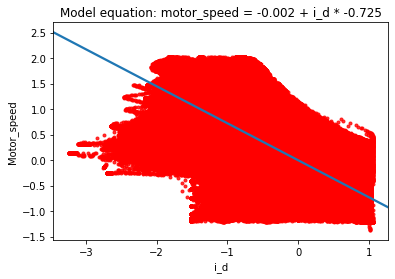

In [23]:
#Model Visualization 
g=sns.regplot(df['i_d'] , df['motor_speed'], 
              ci=None, scatter_kws={'color': 'r', 's':9})
g.set_title('Model equation: motor_speed = -0.002 + i_d * -0.725')
g.set_ylabel('Motor_speed')
g.set_xlabel('i_d');

In [24]:
from sklearn.metrics import r2_score,mean_squared_error

mse=mean_squared_error(y, model.fittedvalues)
rmse=np.sqrt(mse)
rmse

0.6918706566599208

In [25]:
k_t=pd.DataFrame({'Real_values':y[0:50], 
                  'Predicted_values' :model.fittedvalues[0:50]})
k_t['error']=k_t['Real_values']-k_t['Predicted_values']
k_t.head()

,Real_values,Predicted_values,error
0,-1.222428,-0.748361,-0.474067
1,-1.222428,-0.748271,-0.474157
2,-1.222430,-0.750734,-0.471696
3,-1.222429,-0.749982,-0.472447
4,-1.222429,-0.749419,-0.473010


In [26]:
model.resid[0:10] #It is easy way to learn residuals.

0   -0.474067
1   -0.474157
2   -0.471696
3   -0.472447
4   -0.473010
5   -0.473683
6   -0.474024
7   -0.474257
8   -0.474286
9   -0.474331
dtype: float64

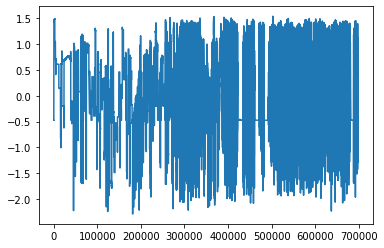

In [27]:
plt.plot(model.resid);

In [28]:
#MULTIPLE LINEAR REGRESSION

X=df.drop("motor_speed", axis=1)
y=df["motor_speed"]

In [29]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

training=df.copy()

In [30]:
lm=sm.OLS(y_train, X_train)

model=lm.fit()
model.summary() #All coefficients are significant for the model by looking at the p-value. ( P>|t| )

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            motor_speed   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                          5.623e+05
Date:                Sat, 08 Feb 2020   Prob (F-statistic):                        0.00
Time:                        17:50:35   Log-Likelihood:                         -55174.
No. Observations:              558919   AIC:                                  1.104e+05
Df Residuals:                  558906   BIC:                                  1.105e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
S.No            3.454e-07   4.38e-09     78.792      0.000    3.37e-07    3.54e-07
ambient           -0.0552      0.000   -120.055      0.000      -0.056      -0.054
coolant            0.3882      0.002    173.291      0.000       0.384       0.393
u_d               -0.1680      0.001   -216.730      0.000      -0.169      -0.166
u_q                0.5439      0.000   1235.228      0.000       0.543       0.545
torque            -0.3727      0.006    -64.224      0.000      -0.384      -0.361
i_d               -0.6596      0.001  -1065.904      0.000      -0.661      -0.658
i_q                0.1700      0.005     31.117      0.000       0.159       0.181
pm                 0.1076      0.001    145.573      0.000       0.106       0.109
stator_yoke       -1.5974      0.007   -233.239      0.000      -1.611      -1.584
stator_tooth       2.3025      0.009    254.276      0.000       2.285       2.320
stator_winding    -1.1684      0.004   -260.082      0.000      -1.177      -1.160
profile_id        -0.0035   4.49e-05    -78.065      0.000      -0.004      -0.003
==============================================================================
Omnibus:                    32132.250   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           131242.646
Skew:                          -0.113   Prob(JB):                         0.00
Kurtosis:                       5.363   Cond. No.                     1.90e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#Root Mean Squared Error for Train
rmse1=np.sqrt(mean_squared_error(y_train,model.predict(X_train)))
rmse1

0.267075571612811

In [32]:
#Root Mean Squared Error for Test
rmse2=np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
rmse2

0.2668587880243436

In [33]:
#Model Tuning for Multiple Linear Regression
model = LinearRegression().fit(X_train,y_train)
cross_val_score1=cross_val_score(model, X_train, y_train, cv=10, scoring='r2').mean() #verified score value for train model
print('Verified R2 value for Training model: ' + str(cross_val_score1))

cross_val_score2=cross_val_score(model, X_test, y_test, cv=10, scoring='r2').mean() #verified score value for test model
print('Verified R2 value for Testing Model: ' + str(cross_val_score2))

Verified R2 value for Training model: 0.9295661478042521
Verified R2 value for Testing Model: 0.9293936836269472


In [34]:
RMSE1=np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, 
                               scoring='neg_mean_squared_error')).mean() #verified RMSE score value for train model
print('Verified RMSE value for Training model: ' + str(RMSE1))

RMSE2=np.sqrt(-cross_val_score(model, X_test, y_test, cv=10, 
                               scoring='neg_mean_squared_error')).mean() #verified RMSE score value for test model
print('Verified RMSE value for Testing Model: ' + str(RMSE2))

Verified RMSE value for Training model: 0.26594885256933276
Verified RMSE value for Testing Model: 0.26570959422909


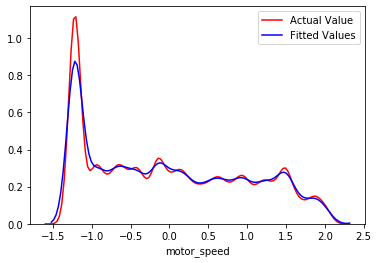

In [35]:
#Visualizing for Multiple Linear Regression y values

import seaborn as sns
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_test, hist=False, color="b", label="Fitted Values" , ax=ax1);

In [36]:
#PRINCIPAL COMPONENT REGRESSION

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca=PCA()
X_reduced_train=pca.fit_transform(scale(X_train))

In [37]:
explained_variance_ratio=np.cumsum(np.round(pca.explained_variance_ratio_ , decimals=4)* 100)[0:20]

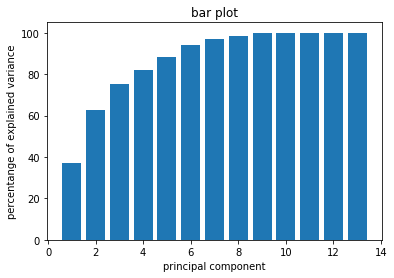

In [38]:
plt.bar(x=range(1, len(explained_variance_ratio)+1), height=explained_variance_ratio)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('bar plot')
plt.show()

In [39]:
lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train,y_train)
print('Intercept: ' + str(pcr_model.intercept_))
print('Coefficients: ' + str(pcr_model.coef_))

Intercept: -0.006718002665872942
Coefficients: [-0.09307285  0.22803067  0.42071856  0.55926719  0.32286883  0.0788697
 -0.02642353 -0.38283327 -0.30887954  0.22513776  0.19079081  0.62338812
 -2.97496718]


In [40]:
#Prediction
y_pred=pcr_model.predict(X_reduced_train)
np.sqrt(mean_squared_error(y_train,y_pred))

0.26593989611745983

In [41]:
df['motor_speed'].mean()

-0.006024095415674543

In [42]:
#R squared
r2_score(y_train,y_pred) 

0.929573835262326

In [43]:
# Prediction For testing error 
pca2=PCA()

X_reduced_test=pca2.fit_transform(scale(X_test))
pcr_model2=lm.fit(X_test,y_test)

y_pred=pcr_model2.predict(X_reduced_test)

print('RMSE for test model : ' +str(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE for test model : 1.172454040993129


In [44]:
#Model Tuning for PCR

lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train[:,0:10],y_train)
y_pred=pcr_model.predict(X_reduced_test[:,0:10])

from sklearn import model_selection

cv_10=model_selection.KFold(n_splits=10,
                           shuffle=True,
                           random_state=1)

In [45]:
lm=LinearRegression()
RMSE=[]

for i in np.arange(1,X_reduced_train.shape[1] + 1):
    score=np.sqrt(-1*model_selection.cross_val_score(lm,
                                                    X_reduced_train[:,:i],
                                                    y_train.ravel(),
                                                    cv=cv_10,
                                                    scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

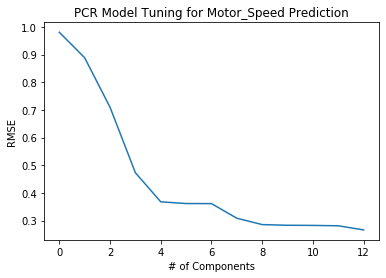

In [46]:
plt.plot(RMSE)
plt.xlabel('# of Components')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning for Motor_Speed Prediction'); 



In [47]:
#KNN REGRESSION

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [48]:
knn_model=KNeighborsRegressor().fit(X_train, y_train)
y_pred=knn_model.predict(X_test)

In [49]:
y_pred.shape

(139730,)

In [50]:
#Model Tuning (learning best n_neighbors hyperparameter)
knn_params={'n_neighbors' : np.arange(1,5,1)}

knn=KNeighborsRegressor()
knn_cv_model=GridSearchCV(knn, knn_params, cv=5)

knn_cv_model.fit(X_train,y_train)
knn_cv_model.best_params_["n_neighbors"]

2

In [51]:
# Train error values from n=1 up n=2
RMSE=[]
RMSE_CV=[]
for k in range(2):
    k=k+1
    knn_model=KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred=knn_model.predict(X_train)
    rmse=np.sqrt(mean_squared_error(y_train,y_pred))
    rmse_cv=np.sqrt(-1*cross_val_score(knn_model,X_train,y_train,cv=2,
                                       scoring='neg_mean_squared_error').mean())

    RMSE.append(rmse)
    RMSE_CV.append(rmse_cv)

    print("RMSE value: ", rmse, 'for k= ',k,
          "RMSE values with applying Cross Validation: ", rmse_cv)

RMSE value:  0.0 for k=  1 RMSE values with applying Cross Validation:  0.04526366465274146
RMSE value:  0.01269480423931161 for k=  2 RMSE values with applying Cross Validation:  0.04533575977539678


In [52]:
#Model Tuning according to best parametre for KNN Regression
knn_tuned=KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train,y_train)
np.sqrt(mean_squared_error(y_test,knn_tuned.predict(X_test)))

0.022821474040920164

In [54]:
#POLYNOMIAL REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

In [55]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X_train)

X_train,X_test,y_train,y_test = train_test_split(x_quad,y_train, random_state = 0)

plr = LinearRegression().fit(X_train,y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print('Polynomial Linear Regression:' ,plr.score(X_test,y_test))

Polynomial Linear Regression: 0.9952925131338077


Coefficients: 
 [ 1.41321128e+00 -2.43783587e-07 -3.29485924e-03  1.35512762e-01
 -7.17063818e-02  8.63915349e-01 -2.56930914e-01 -4.01993683e-01
  1.93024155e-01  5.58982971e-02 -3.37524773e-01  2.38976508e-02
  2.02081332e-01  4.01338365e-03 -3.58602037e-13 -1.73289492e-08
  2.94610894e-07  4.28124566e-07  4.77380457e-08  1.26239630e-06
  5.10477640e-08 -7.93506869e-07  7.01248569e-08 -1.21658944e-06
  1.18230133e-06 -2.80463658e-07  1.24428740e-08 -5.65770069e-03
 -4.35940541e-02  2.40303913e-02  1.30127971e-03  1.90902503e-01
  1.08563606e-02 -1.68691274e-01  3.52587064e-03  4.46099557e-02
  3.75510914e-02 -4.61970998e-02  2.38515486e-04  5.60084124e-02
 -1.67249615e-01 -5.29407157e-02 -8.67428291e-01 -6.18203316e-02
  6.89578552e-01  1.20629296e-01 -3.93460777e-01  2.52139672e-01
  2.24752733e-02 -4.56653640e-03  1.51034249e-01  4.23525702e-02
 -8.65523755e-01  2.42458241e-02  1.04211515e+00 -4.88272022e-02
  6.05818132e-01 -5.89916756e-01  1.43547904e-01 -7.94252650e-03
  4.83464

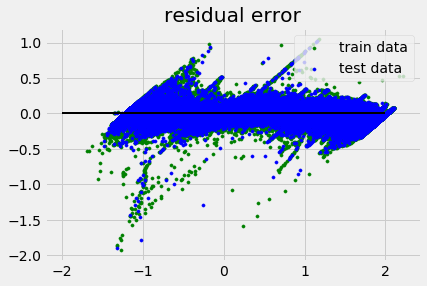

In [56]:
#Plotting Residual in Linear Regression 

from sklearn import linear_model,metrics
#Create linear regression object
reg=linear_model.LinearRegression()

#train the model using the train data sets
reg.fit(X_train,y_train)

#regression coefficients
print("Coefficients: \n", reg.coef_)

#Variance score
print("Variance score: {}".format(reg.score(X_test,y_test)))

plt.style.use('fivethirtyeight')

#plotting residual errors in training data
plt.scatter(reg.predict(X_train),reg.predict(X_train)-y_train, 
            color="green", s=10, label="train data")

#plotting residual errors in test data
plt.scatter(reg.predict(X_test),reg.predict(X_test)-y_test, 
            color="blue", s=10, label="test data")

#plot line for zero residual error
plt.hlines(y=0,xmin=-2, xmax=2, linewidth=2)

#plot legend
plt.legend(loc='upper right')

#plot title
plt.title("residual error")

plt.show()

In [57]:

#Decision Tree Regression
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)

# Fit the decesion tree with the training data
regressor.fit(X_train, y_train)



DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [58]:
# Predict the values related to test data
y_pred = regressor.predict(X_test)

In [59]:
# Calculate the Mean squared error
from sklearn.metrics import mean_squared_error
mse_dt = mean_squared_error(y_test, y_pred)

In [60]:
print("Mean Squared Error", format(mse_dt))

Mean Squared Error 0.0004551007954579


In [61]:
#Random Forest Tree Regression

from sklearn.ensemble import RandomForestRegressor
regressor_1 = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [62]:
# Predicting the test values
y_pred_2 = regressor_1.predict(X_test)

# Calculate the Mean Squared Error
mse_rt = mean_squared_error(y_test, y_pred_2)
print("Mean Squared Error of Random Forest Tree", format(mse_rt))

Mean Squared Error of Random Forest Tree 0.00020714478344097467
